# Introduction


The dataset used is PAMAP2 which is an Activity Monitoring dataset that covers 18 different physical activities which are taken by 9 different subjects, 8 men and 1 woman, taken using 3 inertial measurement units and a heart rate monitor.
The dataset can be used for activity recognition and intensity estimation, while developing and applying algorithms of data processing, extraction and classification. the PAMAP2 Physical Activity Monitoring dataset will be used  to extract actionable insights that will allow the development of HAR software and/or hardware for fitness tracking. 

The objectives of the assignment are the following:
- To carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
- To develop and test at least one hypothesis for a relationship between a single pair of attributes;
- To develop and test at least one model which uses multiple attributes to make predictions.

# Data Loading

The first step is to import all the necessary libraries

In [2]:
#Required cell: This cell needs to be executed to import the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy import integrate
from IPython.display import HTML, display
from scipy.stats import norm
from scipy.stats import t as the
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
%matplotlib inline
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)
from sklearn.model_selection import train_test_split

As part of loading we have to create a list first (list_of_files) which consists of all the file names and the path which needs to be loaded. This list will be used for calling the files. Then we create a list, subjectID which consist of all numbers 1 to 9 which represents the 9 subjects. After that we create a dictionary which consists of the activity ID as the key and the  name of the activity as the value. Then we createa list colNames which consists of the first 3 columns, then the IMU hand, chest ankle lists are created which consists of all the attributes which each of the IMU have. After create these lists, we concatnate them to the variable columns.

In [3]:
# Load data
list_of_files = ['D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject101.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject102.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject103.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject104.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject105.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject106.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject107.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject108.dat',
    'D:/DS/DSRM/ASSIGNMENT/PAMAP2_Dataset/PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list


    

The function load_activity_map() is created which will be used to map the Id with the activity, the dunction pd_fast_plot is created which will be used to plot the graphs, when we create three lists, light_acts, mod_acts, vig_acts which has th eIDs of the activities which are light, moderate and vigorous and these are put correspondingly to the activily levels.

In [4]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map
def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

    #lying, sitting, standing and ironing
light_acts = [1,2,3,17]
#vacuum cleaning, descending stairs, walking, Nordic walking and cycling
mod_acts = [16,13,4,7,6]
#ascending stairs, running and rope jumping
vig_acts = [12,5,24]

#Function used to classify activities
def map_met(act_id):
    if act_id in light_acts:
        return 'light'
    if act_id in mod_acts:
        return 'moderate'
    if act_id in vig_acts:
        return 'vigorous'
    

In the following cell we are loading all the data into a single dataframe, we call the files one by one and then put the content into a dataframe where we set the column names too.

In [5]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)


In [6]:
len(dataCollection)

2872533

## Data Cleaning

As part of cleaning we are dropping the unnecessary columns that were mention in the report, all the orientation attributes that is the hand, chest and the ankle one are removed. Then we remove the throo hand acceleration columns wfor 6g cause due to high impacts caused by certain movements (e.g. during running) with acceleration over 6g, it gets saturated sometimes. Hence the acceleration over 16g is recommended.
Then we drop all the rows where the activity id is 0 since this data mainly covers transient activities between performing different activities, e.g. going from one location to the next activity's location, or waiting for the preparation of some equipment.

Then we create a new column activity level where we mention wether its a light, moderate or vigorous activity. After that we will create new rows where we combine the points in 3d space, we will make a combined column for handacc16_1,handacc16_2,handacc16_3 and likewise for handgyro and handmag. After this we will do the samefor ankle and chest. These will be helppful while plotting.

In [7]:
#Data cleaning
dataCollection=dataCollection.drop(['handAcc6_1','handAcc6_2','handAcc6_3','handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4','chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4','ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],axis = 1) 
dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index)
dataCollection = dataCollection.apply (pd.to_numeric, errors='coerce')
dataCollection = dataCollection.dropna()


In [8]:
dataCollection.insert(1,'ActivityLevel',dataCollection['activityID'].apply(map_met))

In [9]:
dataCollection.insert(4,'handMag',np.sqrt((dataCollection['handMagne1']**2)+(dataCollection['handMagne2']**2)+(dataCollection['handMagne2']**2)))
dataCollection.insert(5,'handAcc',np.sqrt((dataCollection['handAcc16_1']**2)+(dataCollection['handAcc16_2']**2)+(dataCollection['handAcc16_3']**2)))
dataCollection.insert(6,'handGyro',np.sqrt((dataCollection['handGyro1']**2)+(dataCollection['handGyro2']**2)+(dataCollection['handGyro3']**2)))

dataCollection.insert(7,'chestMag',np.sqrt((dataCollection['chestMagne1']**2)+(dataCollection['chestMagne2']**2)+(dataCollection['chestMagne3']**2)))
dataCollection.insert(8,'chestAcc',np.sqrt((dataCollection['chestAcc16_1']**2)+(dataCollection['chestAcc16_2']**2)+(dataCollection['chestAcc16_3']**2)))
dataCollection.insert(9,'chestGyro',np.sqrt((dataCollection['chestGyro1']**2)+(dataCollection['chestGyro2']**2)+(dataCollection['chestGyro3']**2)))


dataCollection.insert(10,'ankleMag',np.sqrt((dataCollection['ankleMagne1']**2)+(dataCollection['ankleMagne2']**2)+(dataCollection['ankleMagne3']**2)))
dataCollection.insert(11,'ankleAcc',np.sqrt((dataCollection['ankleAcc16_1']**2)+(dataCollection['ankleAcc16_2']**2)+(dataCollection['ankleAcc16_3']**2)))
dataCollection.insert(12,'ankleGyro',np.sqrt((dataCollection['ankleGyro1']**2)+(dataCollection['ankleGyro2']**2)+(dataCollection['ankleGyro3']**2)))



In [10]:
dataCollection=dataCollection.drop(['handMagne1','handMagne2','handMagne1','handAcc16_1','handAcc16_2','handAcc16_3','handGyro1','handGyro2','handGyro3','chestMagne1','chestMagne2','chestMagne3','chestAcc16_1','chestAcc16_2','chestAcc16_3','chestGyro1','chestGyro2','chestGyro3','ankleMagne1','ankleMagne2','ankleMagne3','ankleAcc16_1','ankleAcc16_2','ankleAcc16_3','ankleGyro1','ankleGyro2','ankleGyro3','chestAcc6_1','chestAcc6_2','chestAcc6_3','ankleAcc6_1','ankleAcc6_2','ankleAcc6_3','handMagne3'],axis = 1) 


In [11]:
dataCollection

,timestamp,ActivityLevel,activityID,heartrate,handMag,handAcc,handGyro,chestMag,chestAcc,chestGyro,ankleMag,ankleAcc,ankleGyro,handTemperature,chestTemperature,ankleTemperature,subject_id
2932,37.70,light,1,100.0,95.450583,9.751993,0.072467,66.439341,9.875840,0.041521,91.396062,9.956473,0.049304,30.375,32.1875,30.75,1
2943,37.81,light,1,100.0,95.746781,9.583806,0.435808,67.185070,9.859305,0.058315,91.797093,9.946165,0.024230,30.375,32.1875,30.75,1
2954,37.92,light,1,100.0,95.373006,9.639631,0.081883,66.711313,9.798303,0.072202,92.273977,9.911287,0.022479,30.375,32.1875,30.75,1
2965,38.03,light,1,100.0,95.360173,10.045489,0.374651,66.350301,9.929907,0.071764,92.732261,9.760667,0.016725,30.375,32.1875,30.75,1
2976,38.14,light,1,101.0,95.350742,9.963993,0.378423,67.355127,9.804206,0.059240,92.425175,9.888575,0.067042,30.375,32.1875,30.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,vigorous,24,162.0,28.812324,10.876780,0.157022,47.894613,9.884364,0.100384,46.055915,10.063054,0.037724,25.125,32.3750,31.50,9
2871986,94.77,vigorous,24,162.0,26.870687,10.341491,0.458881,47.629733,9.895226,0.162803,45.534863,9.792079,0.010443,25.125,32.3750,31.50,9
2871997,94.88,vigorous,24,162.0,26.981285,10.021582,0.415535,48.081339,9.915689,0.310067,45.661446,9.809462,0.051387,25.125,32.3750,31.50,9
2872007,94.98,vigorous,24,162.0,26.132942,9.932805,0.388336,47.547335,10.178812,0.322284,45.919491,9.947890,0.042514,25.125,32.3750,31.50,9


After the cleaning up of data we will split the dataframe into two, traning set and testing set. This is mainly for the modelling which we will do soon. we call the function train_test_split where we will pass the dataframe, the ratio at which it need to be divided and the random state. It will return two sets which will be stored in training and testing respectively. As we can see we have a training set of 122848 samples and a testing set of 52650 samples.

In [12]:
training_data, testing_data = train_test_split(dataCollection, test_size=0.3, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 122848
No. of testing examples: 52650


In [13]:
training_data

,timestamp,ActivityLevel,activityID,heartrate,handMag,handAcc,handGyro,chestMag,chestAcc,chestGyro,ankleMag,ankleAcc,ankleGyro,handTemperature,chestTemperature,ankleTemperature,subject_id
2625644,1702.08,vigorous,12,139.0,53.854060,16.163897,0.931301,49.590104,13.070887,1.081404,43.563839,10.373201,1.537907,34.2500,38.0625,34.1875,8
1098143,224.64,light,1,73.0,19.638085,9.918705,0.018474,49.338747,9.330957,0.058911,30.334974,9.912648,0.132004,32.8125,34.8125,33.5000,4
1870506,904.86,light,17,84.0,27.798411,9.314533,0.463890,39.577322,9.914426,0.140350,58.405184,9.987989,0.048180,33.8125,36.1875,34.9375,6
1097300,216.21,light,1,72.0,19.790603,9.753240,0.023966,50.097270,9.627314,0.026787,30.046044,9.877875,0.031313,32.8125,34.8125,33.5000,4
1059712,2368.59,moderate,4,119.0,48.852229,7.863950,1.997366,35.950529,13.262695,0.554969,44.687373,19.128132,3.563013,29.4375,36.8750,34.5000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151678,98.44,light,1,83.0,25.068682,9.776432,0.032491,48.153041,9.658415,0.033238,31.660566,10.213012,0.046559,30.2500,32.6875,30.1250,7
1524954,1196.98,light,17,88.0,4.065840,9.233299,1.458080,40.232291,9.796507,0.794053,60.343038,10.061185,0.191315,35.4375,37.5625,34.5000,5
85156,859.94,light,17,104.0,59.312579,9.262748,0.997393,57.924334,10.002432,0.676013,72.430504,9.786085,0.143261,33.2500,35.0000,33.7500,1
1504359,991.03,light,17,88.0,46.655418,13.875824,2.601184,38.412373,9.615096,0.698069,55.510309,8.623337,0.565017,35.3125,37.3125,34.4375,5


# EDA

With the data partitioned into development and testing, exploratory data analysis can now be performed on our development dataset.

The first one is a bar graph where we are plotting the activity to their sample size in the dataframe. As we can see most of them are evenly distributed. Most of it are evenly balanced. only rope jumping is a it less which is a vigorous activity.

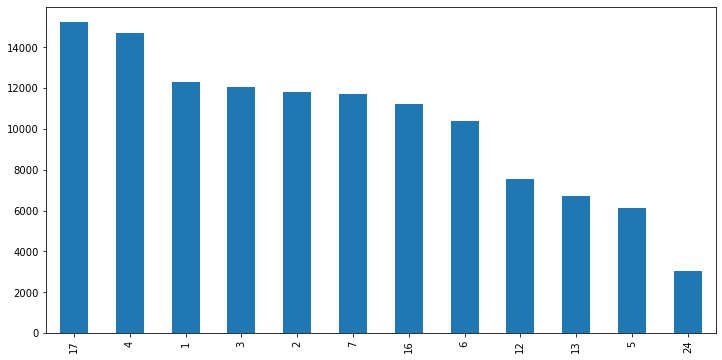

In [14]:
training_data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

<ipython-input-4-fafbde2c1dde>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No handles with labels found to put in legend.


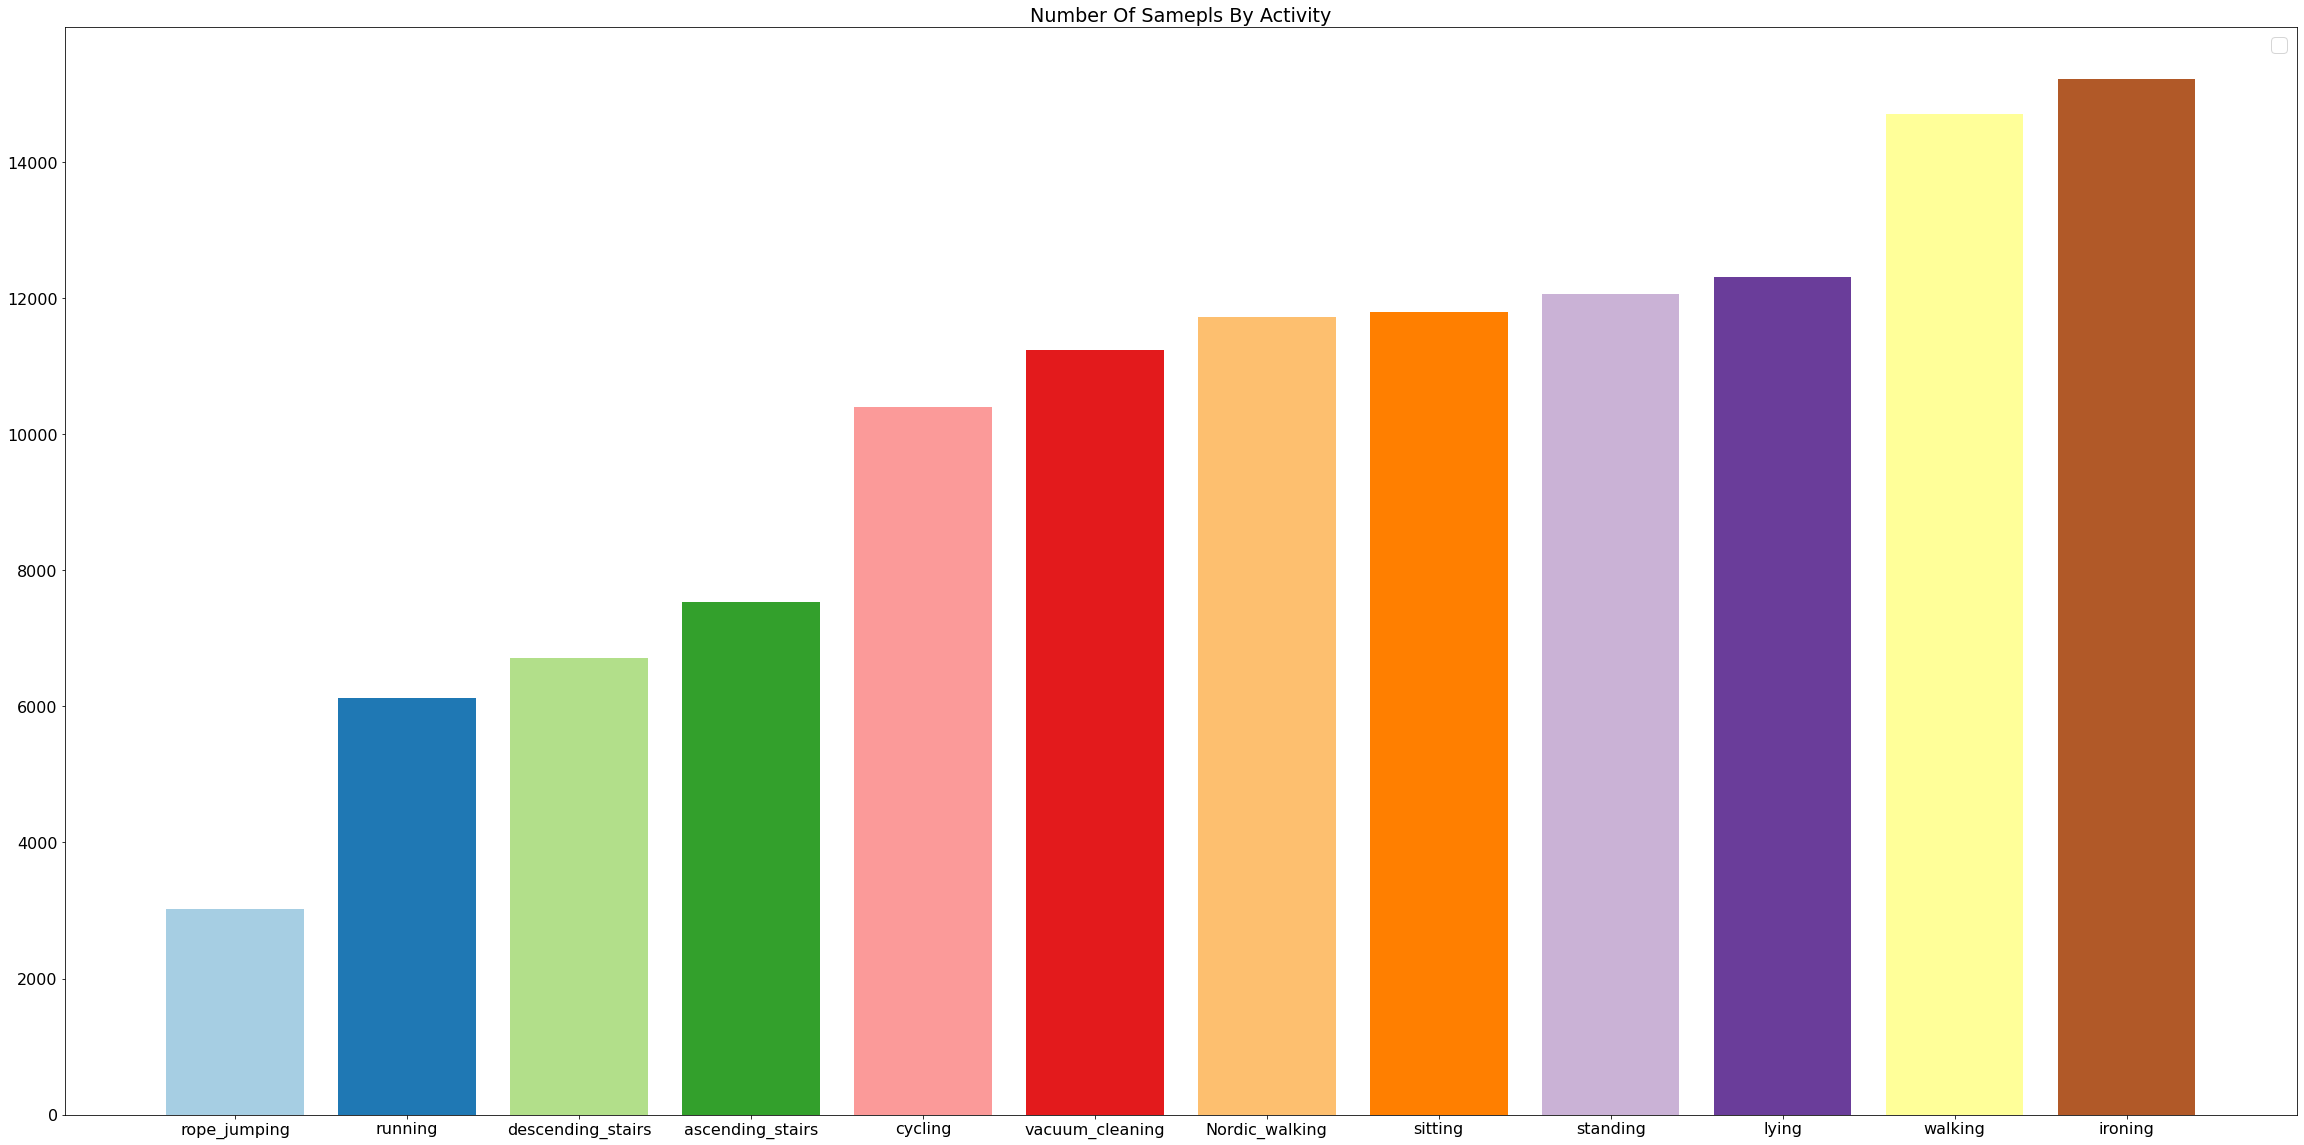

In [15]:
map_ac = load_activity_map()
sampels = training_data.groupby(['activityID']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [map_ac[x] for x in sampels['activityID']]
sampels_to_subject['sampels'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
pd_fast_plot(sampels_to_subject,'sampels','activity','Number Of Samepls By Activity',figsize=(40,20))

Now we are plotting the same thing but as per the activity level.  As we can see below light and moderate have very large sample size compared to vigorous which is only around 11000, while the other two are freater than 50000.
As defined by their MET will be looked for. The activities in the protocol can be classified as:

Light Effort (<3.0 METs): lying, sitting, standing and ironing.

Moderate Effort (3.0 - 6.0 METs): vacuum cleaning, descending stairs, walking, Nordic walking and cycling

Vigorous Effort (> 6.0 MET): ascending stairs, running and rope jumping

Dev Dataset by Activity Intensity Level


ActivityLevel
light       51390
moderate    54787
vigorous    16671
Name: Activity Level Counts, dtype: int64

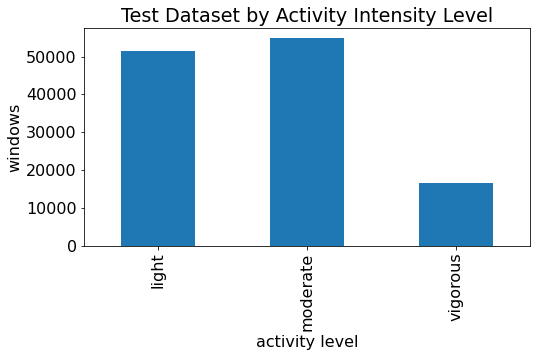

In [16]:
s = training_data.groupby('ActivityLevel').count()['activityID']
s = s.rename("Activity Level Counts")
print(('Dev Dataset by Activity Intensity Level'))
display(s)
ax = s.plot(kind='bar', figsize=(8,4))
_ = ax.set_ylabel('windows')
_ = ax.set_xlabel('activity level')
_ = ax.set_title('Test Dataset by Activity Intensity Level') 

For the next one we will plot the subject IDs with their average heart rate. For the same we will be using a bar graph. 
A data frame result id is created where we take the data from training_ data and it is grouped by subject id.
From the graph we can see that the subject 9 has mch higher hear rate than any other subject. Its above 140 while the rest of them are between 90 and 120. We are going to focus on heart rate as it is our most precice meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. 

<ipython-input-4-fafbde2c1dde>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No handles with labels found to put in legend.


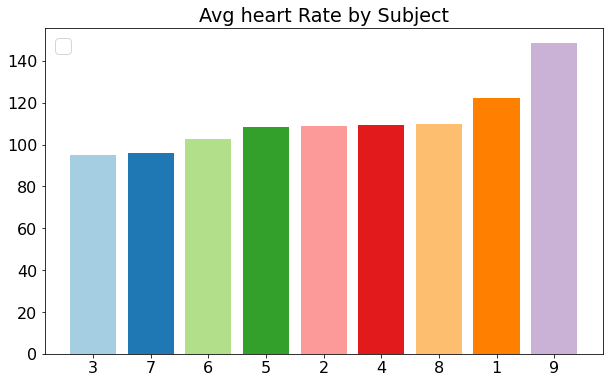

In [17]:
result_id = training_data.groupby(['subject_id']).mean().reset_index()


sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['id'] = result_id['subject_id']
sampels_heart_rate['heartrate'] = result_id['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])
pd_fast_plot(sampels_heart_rate,'heartrate','id','Avg heart Rate by Subject')

The next graph is also a bar graph with the activity levels against the average heart rates. For this we create  a new data frame first,ha in which we are grouping by activity level and taking the mean of hear rate. Then we are using this ha data frame to plot the graph. From the graph we can infer that the heart rate of light activities is less compared to moderate and the heart rate of moderate activities is less compared to vigorous. 

Activity heart rate


ActivityLevel
light        83.888266
moderate    117.606586
vigorous    145.141623
Name: heartrate, dtype: float64

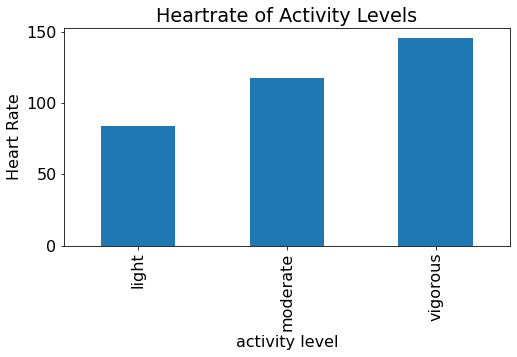

In [18]:
ha = training_data.groupby('ActivityLevel').mean()['heartrate']


print(('Activity heart rate'))
display(ha)
ax = ha.plot(kind='bar', figsize=(8,4))
_ = ax.set_ylabel('Heart Rate')
_ = ax.set_xlabel('activity level')
_ = ax.set_title('Heartrate of Activity Levels') 

For the next graph we are plotting the average temperature by subject. For this we are taking the remperature of hand, chest and ankle. First we create a dataframe sampls_tempereture. Then we put the values of hand temperature, chest temperature and ankle temperature into it from the data frame result_id. One we do that we will pass that to the plot function and get the graph. From the graph we can see that the chest temperateis high for all the subjects followed by ankle and hand. But when it comes to 9 everything falls so low even though the average heartbeat was higher or 9. THIs must be an issue in the data.

<ipython-input-19-e946056f7bd5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


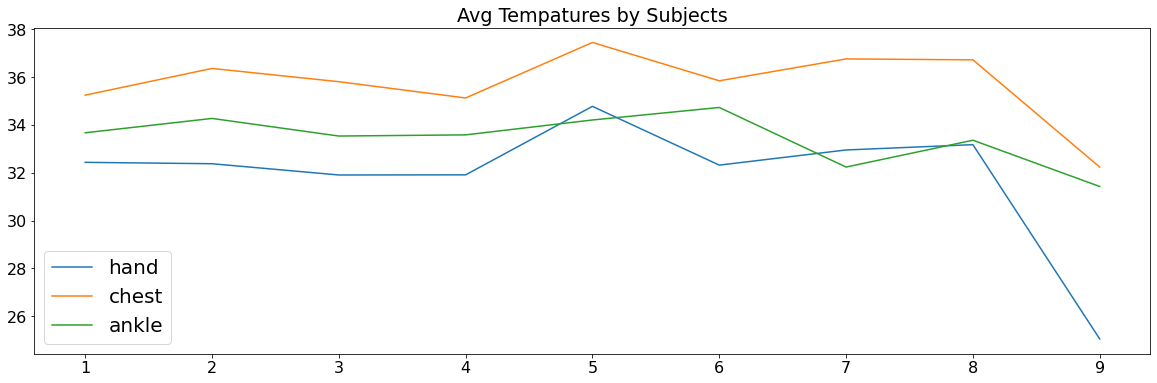

In [19]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = result_id['handTemperature']
samepls_tempreture['chest'] = result_id['chestTemperature']
samepls_tempreture['ankle'] = result_id['ankleTemperature']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

A new data fram eta is created where we are grouping it by activity level. Then we are creating dataframe sample temperature like we did above to take the temperature for hand chest and ankle. Once thats done we will use it to plot the activity level against the temperature. And from the graph we can see that the chest temperature is still the highest followed by ankle and hand, but then again the temperature for vigorous activity level is still the loest which shouldnt be the case.
\

In [20]:
ta = training_data.groupby('ActivityLevel').mean()


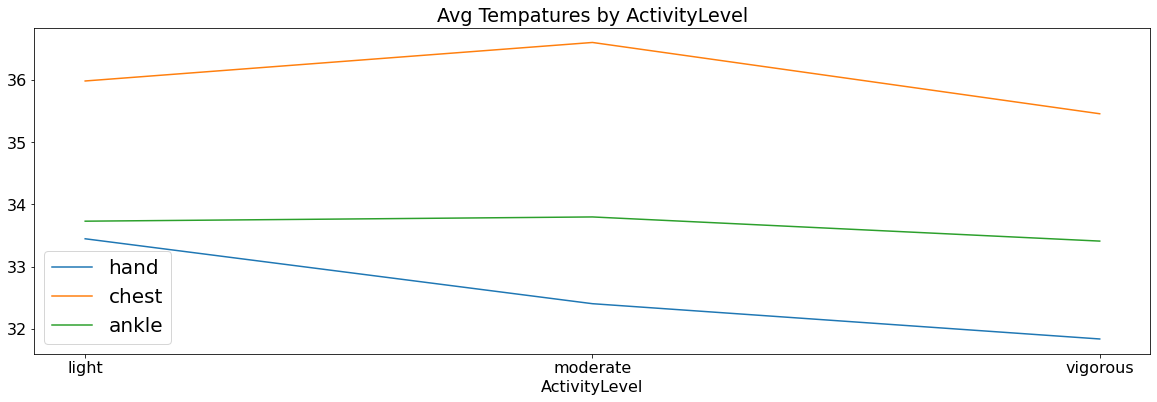

In [21]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = ta['handTemperature']
samepls_tempreture['chest'] = ta['chestTemperature']
samepls_tempreture['ankle'] = ta['ankleTemperature']

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by ActivityLevel')
#a = ax.set_xticklabels(ta['ActivityLevel'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))

In the next graph we are plotting the acceleration of chest, hand and ankle of each sujects. For this we will use the chestacc , handacc and ankleacc calculated in the beginning using the three points in the 3d space. while creating the dataframe result_id we have taken the mean of those and have grouped by subject ids, we us that for this. Like above we create a new data frame sampls where we put chestacc hand acc and ankle acc. THen we pass it for plotting. From the linegraph plotted we can see that the ankle has the most acceleration than any other body part, which is then followed by the hand and then the chest. The acceleration is almost the same for all except 9 where it goes really high.

<ipython-input-22-fc9e94688e69>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


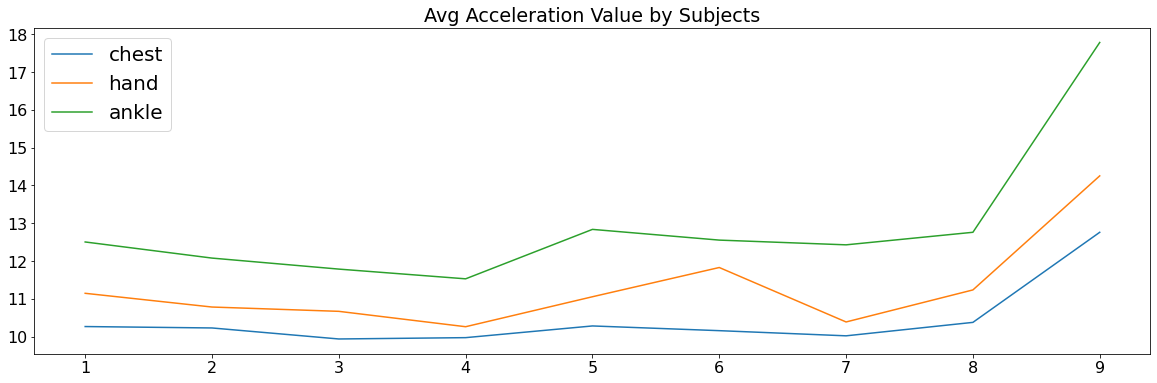

In [22]:
samepls = pd.DataFrame()
samepls['chest'] = result_id['chestAcc']
samepls['hand'] = result_id['handAcc']
samepls['ankle'] = result_id['ankleAcc']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))

Now we are plotting the Hand Temperature against Hand Acceleration, chest temperature against chest acceleration and ankle temperature against ankle acceleration. For this we have used scatter plot and we can see that its mostly distributed. the chest acceleration is almost the same for all temperature. Likewise for the rest too.

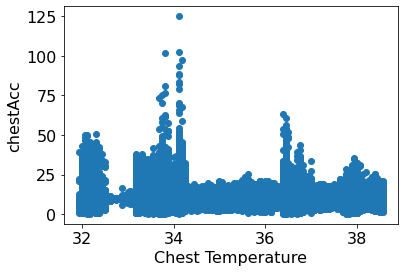

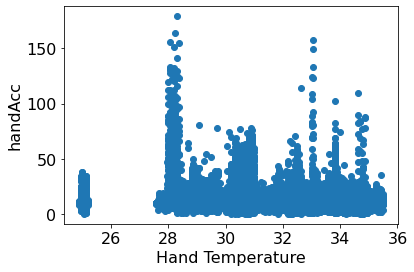

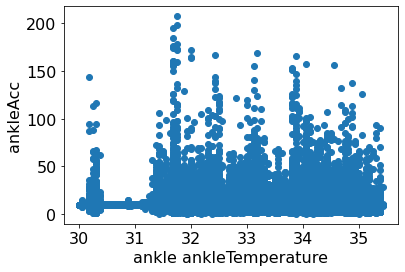

In [390]:
plt.scatter(training_data['chestTemperature'] ,training_data['chestAcc'] )
plt.xlabel('Chest Temperature')
plt.ylabel('chestAcc')
plt.show()

plt.scatter(training_data['handTemperature'] ,training_data['handAcc'] )
plt.xlabel('Hand Temperature')
plt.ylabel('handAcc')
plt.show()


plt.scatter(training_data['ankleTemperature'] ,training_data['ankleAcc'] )
plt.xlabel('ankle ankleTemperature')
plt.ylabel('ankleAcc')
plt.show()



# Hypothesis

During EDA, the Heart Rate was identified as having the potential to allow classification of activities according to their MET equivalent. To check this a set two two hypothesis will be created which will be using the mean of heart rate for each of the MET levels. The mean of the heart rate according to the graphs we got above should be like Light is less than moderate which is less than vigorous.

The First hypothesis is with the light activities and the moderate activities.

### 1: If Heartrate is related with Activity level, then Heart rate of moderate activity level is greater than Heartrate of light activity level.

H0: The mean hearrate of moderate activities have no difference with light activities

H1: The mean heartrate of moderate activities is higher than that of light activities



For the hypothesis we are creating three new data frames, one for each activity level. Then in those data frames we are only putting data corresponding to that activity level

In [35]:
lightdf=testing_data[testing_data['ActivityLevel']=='light']
moddf=testing_data[testing_data['ActivityLevel']=='moderate']
vigdf=testing_data[testing_data['ActivityLevel']=='vigorous']

After that we calculate the value of p value of difference. for that we have to subtract the mean heartrate of moderate and light and then divide it by the squareroot of (moderate standard deviation/count)^2 -(light standard deviation/count)^2 . Then we will get the a value which will be stored in pv. Then the variable pv will be used to get the p value, where it will be passed to the scipy function norm.cdf which will return a value, it will be stored in Pvalue.

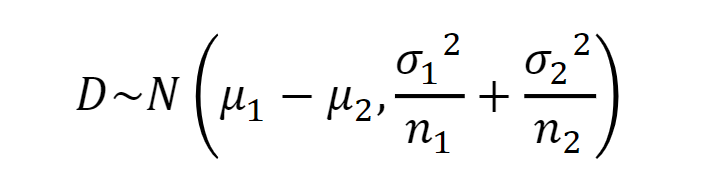

In [36]:
pv=((moddf['heartrate'].mean())-(lightdf['heartrate'].mean()))/(((moddf['heartrate'].std()**2)/(moddf['heartrate'].count()**2))-((lightdf['heartrate'].std()**2)/(lightdf['heartrate'].count()**2)))

In [37]:
import scipy.stats
pValue = 1 - scipy.stats.norm.cdf(pv)
pValue

0.0

With a  P value of 0, the null hypothesis can be rejected. As such it can be concluded that Moderate effort activity levels will have a higher mean HR than light effort activity levels.




The Second hypothesis is with the moderate activities and the vigorous activities.
### 2: If Heartrate is related with Activity level, then Heart rate of vigorous activity level is greater than Heartrate of moderate activity level.

H0: The mean hearrate of vigorous activities have no difference with moderate activities

H1: The mean heartrate of vigorous activities is higher than that of moderate activities

We are calculating th P value the same way we did above. We have to subtract the mean heartrate of vigorous and moderate and then divide it by the squareroot of (vigorous standard deviation/count)^2 -(moderate standard deviation/count)^2 . Then we will get the a value which will be stored in pv. Then the variable pv will be used to get the p value, where it will be passed to the scipy function norm.cdf which will return a value, it will be stored in Pvalue.

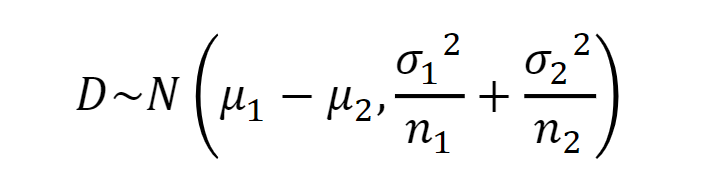

In [38]:
pv=((vigdf['heartrate'].mean())-(moddf['heartrate'].mean()))/(((vigdf['heartrate'].std()**2)/(vigdf['heartrate'].count()**2))-((moddf['heartrate'].std()**2)/(moddf['heartrate'].count()**2)))

In [39]:
import scipy.stats
pValue = 1 - scipy.stats.norm.cdf(pv)
pValue

0.0

With the p value coming as 0.0, we can say that the null hypothesis can be rejected. Hence it can be concluded that the vigorous activity level will have higher mean HR than moderate activity level. 

From the above two hypothesis tests, we can conclude that hearrate and MET value will be enough tp identify the activities in the dataset.



### 3: We want to see if theres any relation between heartrate and temperature.

H0: Chest Temperature is not dependent on Heartrate

H1: Chest Temperature is dependent on Heartrate

For the same we are using the pearsons correlation method. And we calculate the regression r value and p value to make the decision.

In [26]:
from scipy.stats import pearsonr

d1=testing_data['heartrate']
d2=testing_data['chestTemperature']
stat, p = pearsonr(d1, d2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-0.120, p=0.000


Since the p-value is less than 0.05, the null hypothesis can be rejected. Hence from H1, we can conclude that the Chest temperature is dependent on heart rate.

# Modelling

For modelling the first thing is to create a training set without any labels like activityID, timestamp, subjectID etc. Ater that we are creating another dataframe trainl which has acivityID and subject ID, this will be used afterwards for creating a dataframe.

In [330]:
training_data_temp=training_data.drop(['activityID','timestamp','subject_id','handGyro','chestGyro','ankleGyro','chestMag','handMag','ankleMag'],axis=1)
trainl = training_data[['activityID','subject_id']]

In [331]:
training_data_temp

,heartrate,handAcc,chestAcc,ankleAcc,handTemperature,chestTemperature,ankleTemperature
2625644,139.0,16.163897,13.070887,10.373201,34.2500,38.0625,34.1875
1098143,73.0,9.918705,9.330957,9.912648,32.8125,34.8125,33.5000
1870506,84.0,9.314533,9.914426,9.987989,33.8125,36.1875,34.9375
1097300,72.0,9.753240,9.627314,9.877875,32.8125,34.8125,33.5000
1059712,119.0,7.863950,13.262695,19.128132,29.4375,36.8750,34.5000
...,...,...,...,...,...,...,...
2151678,83.0,9.776432,9.658415,10.213012,30.2500,32.6875,30.1250
1524954,88.0,9.233299,9.796507,10.061185,35.4375,37.5625,34.5000
85156,104.0,9.262748,10.002432,9.786085,33.2500,35.0000,33.7500
1504359,88.0,13.875824,9.615096,8.623337,35.3125,37.3125,34.4375


train_data1 is created where training_data is converted to array. Then we do the clustering which is the process of grouping data in such a way that objects in the same group or cluster are more similar to each other than to those in other clusters.
We use the K-means clustering in which the similarity between cluster points is derived by the closeness of a point to the centroid of the cluster.

In [332]:
train_data1=training_data_temp.to_numpy()

K=3 # specify number of clusters
#Clustering
cl_K3=cluster.KMeans(init='random',n_clusters=K)
cl_K3.fit(train_data1)  
cl_K3.predict(train_data1)

array([0, 1, 1, ..., 0, 1, 1])

Then we use the predictfunc tion to predict the label for all the data and it will be stored to ax. 

In [345]:
ax =cl_K3.predict(training_data_temp)
print(ax)

[0 1 1 ... 0 1 1]


A data frame train_Data1 is created, where we put a copy of traning_Data_temp and then add two more columns, one for activity and the otehr for predicted label which we created above.

In [346]:
train_data1=training_data_temp.copy(deep=True)
train_data1['activity']=trainl['activityID']
train_data1['predicted_label']=ax
train_data1.head(10)



#map_ac[x] for x in sampels['activityID']


,heartrate,handAcc,chestAcc,ankleAcc,handTemperature,chestTemperature,ankleTemperature,activity,predicted_label
2625644,139.0,16.163897,13.070887,10.373201,34.2500,38.0625,34.1875,12,0
1098143,73.0,9.918705,9.330957,9.912648,32.8125,34.8125,33.5000,1,1
1870506,84.0,9.314533,9.914426,9.987989,33.8125,36.1875,34.9375,17,1
1097300,72.0,9.753240,9.627314,9.877875,32.8125,34.8125,33.5000,1,1
1059712,119.0,7.863950,13.262695,19.128132,29.4375,36.8750,34.5000,4,0
2229737,84.0,9.289872,10.252639,9.862815,33.5625,36.3750,32.6875,17,1
2030534,94.0,6.605565,6.516699,10.705343,31.7500,36.5000,34.8750,4,1
1723120,133.0,28.771755,12.435896,15.497875,34.1250,37.6250,34.1875,6,0
2524767,80.0,9.729208,9.716566,9.935296,34.4375,37.5625,34.1875,3,1
1201439,107.0,8.067283,8.434496,10.075797,33.6875,36.0000,34.4375,16,0


We plot the Heartrate against hand acceleration to see how the clusters are created, and as we can see from the graph below, its divided into three clusters, the orange one is the first one, the blue the second and green the third.

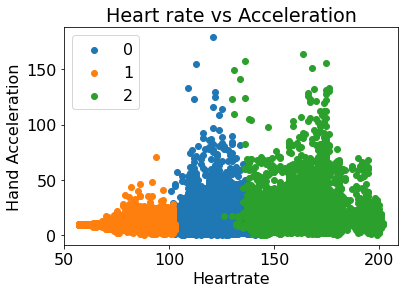

In [356]:
plt.scatter(train_data1[train_data1['predicted_label']==0].heartrate,train_data1[train_data1['predicted_label']==0].handAcc)
plt.scatter(train_data1[train_data1['predicted_label']==1].heartrate,train_data1[train_data1['predicted_label']==1].handAcc)
plt.scatter(train_data1[train_data1['predicted_label']==2].heartrate,train_data1[train_data1['predicted_label']==2].handAcc)
plt.xlabel('Heartrate')
plt.ylabel('Hand Acceleration')
plt.legend([0,1,2])
plt.title('Heart rate vs Acceleration')
plt.show()


The same way we plot graphs for Heart Rate vs Chest Acceleration, from 50 to 100 hear rate it is one clluster, then from 100 to 150 another one and 150 to 200 third one.

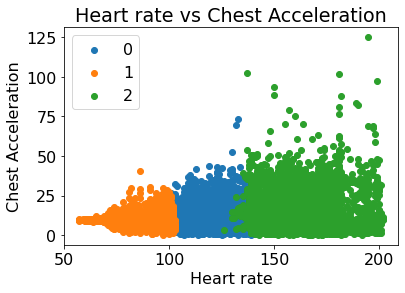

In [358]:
plt.scatter(train_data1[train_data1['predicted_label']==0].heartrate,train_data1[train_data1['predicted_label']==0].chestAcc)
plt.scatter(train_data1[train_data1['predicted_label']==1].heartrate,train_data1[train_data1['predicted_label']==1].chestAcc)
plt.scatter(train_data1[train_data1['predicted_label']==2].heartrate,train_data1[train_data1['predicted_label']==2].chestAcc)
plt.xlabel('Heart rate')
plt.ylabel('Chest Acceleration')
plt.legend([0,1,2])
plt.title('Heart rate vs Chest Acceleration')
plt.show()

The same way we plot graphs for Heart Rate vs ankle Acceleration, from 50 to 100 hear rate it is one clluster, then from 100 to 150 another one and 150 to 200 third one.

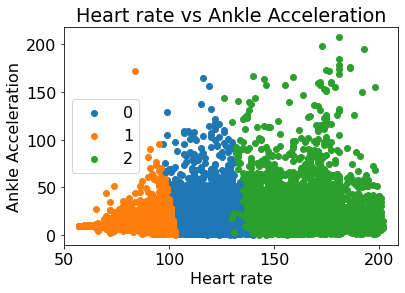

In [359]:
plt.scatter(train_data1[train_data1['predicted_label']==0].heartrate,train_data1[train_data1['predicted_label']==0].ankleAcc)
plt.scatter(train_data1[train_data1['predicted_label']==1].heartrate,train_data1[train_data1['predicted_label']==1].ankleAcc)
plt.scatter(train_data1[train_data1['predicted_label']==2].heartrate,train_data1[train_data1['predicted_label']==2].ankleAcc)
plt.xlabel('Heart rate')
plt.ylabel('Ankle Acceleration')
plt.legend([0,1,2])
plt.title('Heart rate vs Ankle Acceleration')
plt.show()

We create a dataframe df_label to see what has been predicted. For that we are taking the activity and the predicted labels and grouping by it. Each label represents the level of activities. The cluster 0 consists of Moderate activities, cluster 1 consists of Light activities and 2 consists of vigoroous activities. And as we can see the activities are divided into the right labels. ACtivity 1,2,3 are light activities which are in label 1. THen the activity 4, which is walking i s a moderate activity which is in label 2, then activity 5, Running is a vigorous activity is in label 2 and so on.

In [338]:
df_label = train_data1.groupby(['activity','predicted_label']).predicted_label.count().unstack()
df_label


predicted_label,0,1,2
activity,,,
1,335.0,11981.0,NaN
2,207.0,11589.0,NaN
3,1331.0,10726.0,NaN
4,11829.0,2886.0,NaN
5,1263.0,89.0,4772.0
6,10199.0,135.0,66.0
7,10456.0,326.0,940.0
12,4223.0,763.0,2542.0
13,3562.0,797.0,2346.0


Now we have to test it with the testing data, and for that we are preparing the testing set. For that we do the same thing we did for the training data. Dropping all the unnecessary columns like activityID, timestamp etc.
Then we create testl where we have two columns activityID and subjectID.

In [362]:
test_data_temp=testing_data.drop(['activityID','timestamp','subject_id','handGyro','chestGyro','ankleGyro','chestMag','handMag','ankleMag','ActivityLevel'],axis=1)
testl = testing_data[['activityID','subject_id']]

created ax test for all the predicted labels. we are passing the test_data_temp to predict the labels.

In [341]:
ax_test =cl_K3.predict(test_data_temp)
print(ax_test)

[1 0 1 ... 1 0 1]


We then add two columns predicted_label and activity to the test_Data1 from the testl data frame

In [342]:
test_data_temp['predicted_label']=ax_test
test_data1=test_data_temp.copy(deep=True)
test_data1['activity']=testl['activityID']
test_data1.head(10)

,heartrate,handAcc,chestAcc,ankleAcc,handTemperature,chestTemperature,ankleTemperature,predicted_label,activity
963970,94.0,11.408266,9.751466,10.018422,33.1875,36.6875,34.0625,1,16
1054560,119.0,15.373321,8.965425,10.046451,29.8750,36.9375,34.5625,0,4
1832564,72.0,9.789977,9.935780,10.003130,33.5000,35.8750,34.7500,1,2
1720189,124.0,13.897841,9.355981,16.588538,34.2500,37.8125,34.2500,0,6
2166356,61.0,9.693993,9.858129,9.940656,31.0000,33.8125,30.8125,1,1
1480592,87.0,9.831521,9.895031,10.318878,35.1250,37.0625,34.3125,1,3
711694,131.0,9.945269,4.309880,9.365050,30.4375,35.4375,34.1250,0,7
2287990,72.0,10.057362,9.727764,9.911510,34.1875,37.6250,33.0625,1,12
555898,144.0,13.818170,14.614707,30.361028,34.1250,38.0625,35.3125,2,12
1831306,72.0,9.679798,9.781048,10.180866,33.5000,35.8750,34.7500,1,2


we then create a dataframe d_test_label which has activity and predicted labels. And we can see the activities are divided into clusters the same way it was did for the training set. Activities1,2 and 3 are in label q which is light. Activity 4 is in label 0 which is moderate. Activity 5 is in 2 which is vigorous. Hence we can say it is working as expected

In [343]:
df_label_test = test_data1.groupby(['activity','predicted_label']).predicted_label.count().unstack()
df_label_test

predicted_label,0,1,2
activity,,,
1,162.0,5097.0,NaN
2,89.0,4996.0,NaN
3,612.0,4587.0,NaN
4,5060.0,1223.0,NaN
5,520.0,20.0,2001.0
6,4445.0,54.0,34.0
7,4601.0,127.0,407.0
12,1804.0,301.0,1066.0
13,1514.0,334.0,1032.0


Now we need to find the Silhouette Coefficient or silhouette score which is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

For that we import the silhouette_score function from sklearn.metrics.cluster. Then we pass the training_data_temp  to that function. And we we can see the score came out as 0.5205 which means the clusters are apart from each other and distinguished well.

In [368]:

from sklearn.metrics.cluster import silhouette_score 
SC_3=silhouette_score(training_data,cl_K3.labels_)
print('Silhouette Score = ', SC_3)


Silhouette Score =  0.2702782813219407


# Conclusion

For this report we had three objectives. First one was Cleaning up the data and exploratory data analysis. There we had removed all the transient activities and removed all the unnecessary columns as part of cleanup, then for EDA we mainly used heartrate for all the plottings and as we could see vigorous activities has more heartrate. But then we came to know that subjet 9 has some issues with the attributes in the data. 

Then for the second objective, we did three hypothesis. The first two was regrading the hearrate and the activity level, where we came to the conclusion that hearrate of different levels goes in the order vigorous > moderate > light. For the third hypothesis we checked if temperature is depended on hearrate came to the conclusion that it is.

Then for the third objective modelling, we created clusters and then used the training data to see if the predictions was right. Afterwards we used the testing data set which also yielded the same results as the training set. Hence the modelling was successful. 